In [77]:
%reload_ext autoreload
%autoreload 2

from ripple_heterogeneity.utils import (
    loading,
    add_new_deep_sup,
    functions
)
import matplotlib.pyplot as plt
import seaborn as sns
from ripple_heterogeneity.utils import scalebars

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

In [55]:
basepath = r"Z:\Data\HMC1\day13"

cm,data = loading.load_cell_metrics(basepath)
cm = add_new_deep_sup.deep_sup_from_deepSuperficialDistance(cm)

In [58]:
cm.query("deepSuperficial=='middle'").deepSuperficialDistance

274    -1.762359
281    -1.762359
294    -1.762359
314     0.000000
333     0.000000
350    -1.942430
355   -16.942430
357    -1.942430
370    -1.762359
372    28.237641
383    19.237600
385     0.000000
409   -10.762400
411    -1.762359
412    -1.762359
417   -10.762400
418   -10.762400
424     0.000000
426    -1.942430
429     0.000000
Name: deepSuperficialDistance, dtype: float64

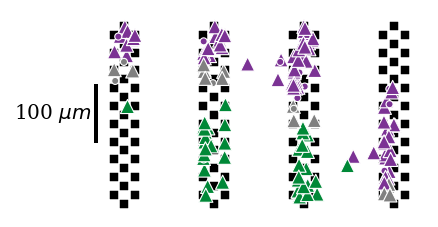

In [98]:
fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=.5, subplots=(1, 1)), edgecolor=None
)
group_colors = {
    "Deep": "#7b3294",
    "Superficial": "#008837",
    "middle": "grey"
}
sns.set_palette(sns.color_palette(group_colors.values()))

plt.scatter(data["chanCoords_x"], data["chanCoords_y"], color="k",marker="s",s=13, zorder=-1000)
markers = {"Pyramidal Cell": "^", "Wide Interneuron": ".", "Narrow Interneuron": "."}
sns.scatterplot(
    data=cm[cm.brainRegion.str.contains("CA1")],
    x="trilat_x",
    y="trilat_y",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    style="putativeCellType",
    markers=markers,
    s=50,
)
plt.gca().get_legend().remove()

plt.xlim(1150, 1700)
plt.ylim(-300,35)
sns.despine()


scalebars.add_scalebar(
    plt.gca(),
    matchx=False,
    matchy=False,
    hidex=True,
    hidey=True,
    pad=0,
    loc=6,
    sizey=100,
    barwidth=2,
    borderpad=-5,
    labely="100 $\mu m$",
)

plt.savefig(
    os.path.join(fig_save_path, "deep_sup_probe_example_HMC1_day13.svg"),
    dpi=300,
    bbox_inches="tight",
)